In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm


def set_fatty_liver_categories(stiffness):
    """
    Given liver stiffness value, assigns a string labeled Normal, Moderate, Severe, or Cirrhosis.
    :param stiffness: float of Liver stiffness in kPa.
    :return: string of bucket to value is to be categorized in.
    """
    if stiffness < 7.5:
        return "Normal"
    elif 7.5 <= stiffness < 10:
        return "Moderate"
    elif 10 <= stiffness < 14:
        return "Severe"
    elif stiffness >= 14:
        return "Cirrhosis"



def adjust_income_values(income):
    """
    Given an income code, assigns a descriptive label corresponding to NHANES codebook.
    :param income: int income code.
    :return: string descriptive label for income codes.
    """
    if income == 1:
        return "0 to 4,999"
    elif income == 2:
        return "5,000 to 9,999"
    elif income == 3:
        return "10,000 to 14,999"
    elif income == 4:
        return "15,000 to 19,999"
    elif income == 5:
        return "20,000 to 24,999"
    elif income == 6:
        return "25,000 to 34,999"
    elif income == 7:
        return "35,000 to 44,999"
    elif income == 8:
        return "45,000 to 54,999"
    elif income == 9:
        return "55,000 to 64,999"
    elif income == 10:
        return "65,000 to 74,999"
    elif income == 12:
        return "20,000 and over"
    elif income == 13:
        return income == "Under 20,000"
    elif income == 14:
        return "75,000 to 99,999"
    elif income == 15:
        return "100,000 and Over"
    elif income == 77:
        return "Refused"
    elif income == 99:
        return "Don't Know"
    elif income == ".":
        return ""


def adjust_edu_values(edu):
    """
    Assigns education level codes a descriptive label.
    :param edu: int education level code.
    :return: string descriptive label for education level code.
    """
    if edu == 1:
        return "Less than high school degree"
    elif edu == 2:
        return "High school / GED / AA degree"
    elif edu == 3:
        return "College graduate or above"
    elif edu == 7:
        return "Refused"
    elif edu == 9:
        return "Don't Know"
    elif edu == ".":
        return ""


def adjust_age_values(age):
    """
    Given age code, assigns a descriptive label.
    :param age: int age code.
    :return: string descriptive label for an age code.
    """
    if age == 1:
        return "<20 years"
    elif age == 2:
        return "20-39 years"
    elif age == 3:
        return "40-59 years"
    elif age == 4:
        return "60+ years"
    elif age == ".":
        return ""

def adjust_gender_values(gender):
    """
    Assigns string label to gender code.
    :param gender: int gender code, 1 == male, 2 == female
    :return: string label for male or female.
    """
    if gender == 1:
        return "Male"
    elif gender == 2:
        return "Female"

def adjust_cap_values(cap):
    """
    Given a CAP score for liver steatosis, assigns stage levels for severity.
    :param cap: int CAP score.
    :return: string label for liver steatosis severity.
    """
    if cap < 238:
        return "Normal"
    elif 238 <= cap <= 260:
        return "S1"
    elif 260 < cap <= 290:
        return "S2"
    elif cap > 290:
        return "S3"

def calculate_bmi(weight, height):
    """
    Calculates bmi given weight and height and assigns a category for that bmi.
    :param weight: float weight in kilograms (kg).
    :param height: float height in centimeters (cm).
    :return: string category for calculated bmi.
    """
    height = height / 100  # Convert to meters
    bmi = weight / (height ** 2)
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi <= 24.9:
        return "Normal Weight"
    elif 25 <= bmi <= 29.9:
        return "Overweight"
    elif bmi >= 30:
        return "Obese"

C:\Users\TNYae\Desktop\BIO-340\venv\lib\site-packages\pandas\core\reshape\merge.py:1207: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


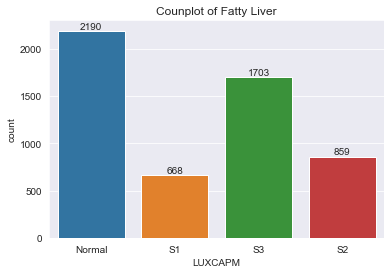

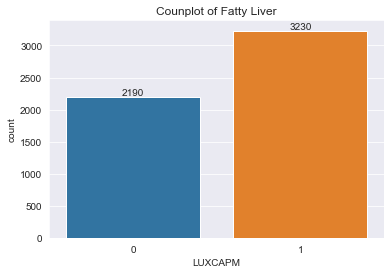

              precision    recall  f1-score   support

           0       0.57      0.07      0.12       669
           1       0.60      0.96      0.74       957

    accuracy                           0.60      1626
   macro avg       0.58      0.52      0.43      1626
weighted avg       0.58      0.60      0.48      1626



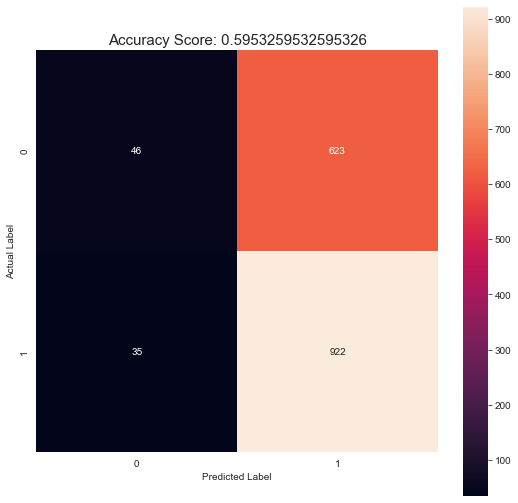

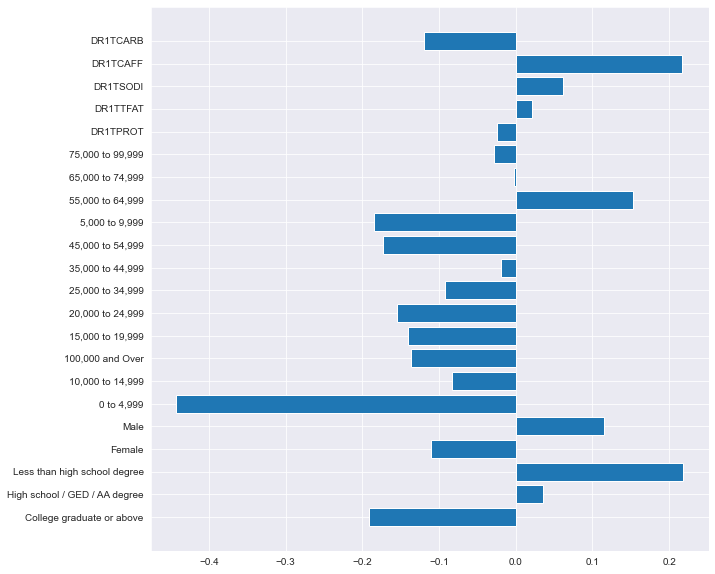

Optimization terminated successfully.
         Current function value: 0.664719
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                LUXCAPM   No. Observations:                 3794
Model:                          Logit   Df Residuals:                     3772
Method:                           MLE   Df Model:                           21
Date:                Mon, 08 Aug 2022   Pseudo R-squ.:                 0.01285
Time:                        12:48:34   Log-Likelihood:                -2521.9
converged:                       True   LL-Null:                       -2554.8
Covariance Type:            nonrobust   LLR p-value:                 1.709e-06
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
College graduate or above        -0.1871      0.178     -1.051      0.

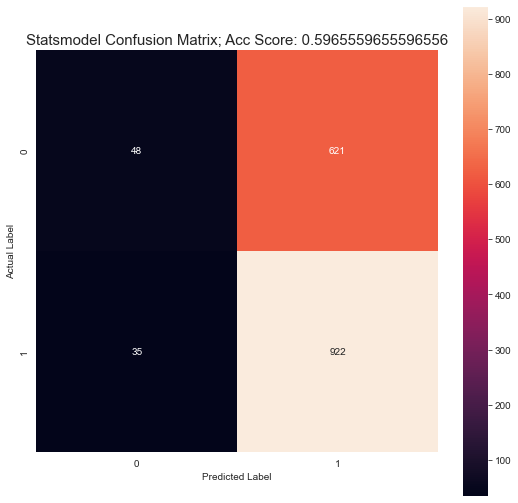

College graduate or above        0.293158
High school / GED / AA degree    0.807785
Less than high school degree     0.217611
Female                           0.033855
Male                             0.000731
0 to 4,999                       0.025133
10,000 to 14,999                 0.600886
100,000 and Over                 0.240758
15,000 to 19,999                 0.354470
20,000 to 24,999                 0.311605
25,000 to 34,999                 0.464087
35,000 to 44,999                 0.822761
45,000 to 54,999                 0.229672
5,000 to 9,999                   0.384949
55,000 to 64,999                 0.390930
65,000 to 74,999                 0.935708
75,000 to 99,999                 0.781991
DR1TPROT                         0.674428
DR1TTFAT                         0.726795
DR1TSODI                         0.326184
DR1TCAFF                         0.000003
DR1TCARB                         0.012474
dtype: float64
                                     OR  Lower CI  Higher CI


In [22]:
%matplotlib inline

# Import necessary files.
demographics = pd.read_csv('./DEMO_J.csv', encoding='latin1')
liver_csv = pd.read_csv('./LUX_J.csv', encoding='latin1')
dietary_csv = pd.read_csv('./DR1TOT_J.csv', encoding='latin1')
body_csv = pd.read_csv('./BMX_J.csv', encoding='latin1')

# Select columns of interest - see data_variables_to_use.txt for descritpions.
demo_x = pd.DataFrame(demographics[['SEQN', 'DMDHRAGZ', 'DMDHREDZ', 'INDHHIN2', 'RIAGENDR']])
diet_x = pd.DataFrame(dietary_csv[[
    'SEQN', 'DR1TPROT', 'DR1TTFAT', 'DR1TSODI', 'DR1TCAFF', 'DR1TCARB'
]])
body_x = pd.DataFrame(body_csv[['SEQN', 'BMXWT', 'BMXHT']])

# Select desired outcomes - ultimately use LUXCAPM.
liver_y = pd.DataFrame(liver_csv[['SEQN', 'LUXSMED', 'LUXCAPM']])

# Merge the various csvs on SEQN
data_df = demo_x.merge(liver_y, on='SEQN', how='inner')
data_df = data_df.merge(diet_x, on='SEQN', how='inner')
data_df = data_df.merge(body_x, on='SEQN', how='inner')
data_df.dropna(axis=0, inplace=True)

# Standardize continuous variables
scalar = StandardScaler()
data_df['DR1TPROT'] = scalar.fit_transform(data_df[['DR1TPROT']])
data_df['DR1TTFAT'] = scalar.fit_transform(data_df[['DR1TTFAT']])
data_df['DR1TSODI'] = scalar.fit_transform(data_df[['DR1TSODI']])
data_df['DR1TCAFF'] = scalar.fit_transform(data_df[['DR1TCAFF']])
data_df['DR1TCARB'] = scalar.fit_transform(data_df[['DR1TCARB']])

# Create dummy variables for variables.
## age = pd.get_dummies(data_df['DMDHRAGZ'].apply(adjust_age_values))
education = pd.get_dummies(data_df['DMDHREDZ'].apply(adjust_edu_values))
annual_income = pd.get_dummies(data_df['INDHHIN2'].apply(adjust_income_values), drop_first=True)
gender = pd.get_dummies(data_df['RIAGENDR'].apply(adjust_gender_values))
bmi = pd.get_dummies(data_df.apply(lambda x: calculate_bmi(x['BMXWT'], x['BMXHT']), axis=1))


liver_damage = pd.get_dummies(data_df['LUXSMED'].apply(set_fatty_liver_categories))
fatty_liver = data_df['LUXCAPM'].apply(adjust_cap_values)

# df to input into logistic regression
final_df = pd.concat([education, gender, annual_income, fatty_liver, data_df['DR1TPROT'], data_df['DR1TTFAT'], data_df['DR1TSODI'], data_df['DR1TCAFF'], data_df['DR1TCARB']], axis=1)

# Plot distribution of fatty liver stages.
ax = sns.countplot(x='LUXCAPM', data=final_df)
ax.bar_label(ax.containers[0])
ax.set_title('Counplot of Fatty Liver')
plt.show()

# Create outcome labels.
labels = pd.DataFrame(final_df['LUXCAPM'])
labels.LUXCAPM[labels.LUXCAPM == 'Normal'] = 0
labels.LUXCAPM[labels.LUXCAPM == 'S1'] = 1
labels.LUXCAPM[labels.LUXCAPM == 'S2'] = 1
labels.LUXCAPM[labels.LUXCAPM == 'S3'] = 1

# Plot distribution of label categories
ax = sns.countplot(x='LUXCAPM', data=labels)
ax.bar_label(ax.containers[0])
ax.set_title('Counplot of Fatty Liver')
plt.show()


# Drop non-useful columns and the outcome column
final_df.drop(['LUXCAPM' ,'Refused', 'Don\'t Know', '20,000 and over'], axis=1, inplace=True)
final_df = final_df.apply(pd.to_numeric)
labels = labels.apply(pd.to_numeric)


# Create test and train sets.
x_train, x_test, y_train, y_test = train_test_split(
    final_df, labels, test_size=0.3, random_state=0
)

# Logistic Regression scikit
logmodel = LogisticRegression()
logmodel.fit(x_train, np.ravel(y_train))
predict_log = logmodel.predict(x_test)

# Model evaluation starts here:
print(classification_report(y_test, predict_log))
score = logmodel.score(x_test, y_test)

# Confusion matrix
cm = confusion_matrix(y_test, predict_log)
plt.figure(figsize=(9,9))
sns.heatmap(cm, fmt='g', annot=True, square=True)
plt.ylabel('Actual Label')
plt.xlabel("Predicted Label")
plt.title(f'Accuracy Score: {score}', size=15)
plt.show()

# Variable importance
importance = logmodel.coef_.flatten()
plt.figure(figsize=(10,10))
plt.barh(final_df.columns, importance)
plt.show()

# Logistic Regression statsmodel
logreg = sm.Logit(y_train, x_train).fit()
print(logreg.summary())
logpredict = logreg.predict(x_test)
prediction = list(map(round, logpredict))
cm_statsmodel = confusion_matrix(y_test, prediction)
score_statsmodel = accuracy_score(y_test, prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm_statsmodel, fmt='g', annot=True, square=True)
plt.ylabel('Actual Label')
plt.xlabel("Predicted Label")
plt.title(f'Statsmodel Confusion Matrix; Acc Score: {score_statsmodel}', size=15)
plt.show()

print(logreg.pvalues)

# Statsmodel odds ratios
odds_ratios = pd.DataFrame({
    "OR": logreg.params,
    "Lower CI": logreg.conf_int()[0],
    "Higher CI": logreg.conf_int()[1]
})

odds_ratios = np.exp(odds_ratios)
print(odds_ratios)